In [1]:
import pandas as pd

df = pd.read_csv('Pharma_Industry.csv')

df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [3]:
df.columns

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

In [4]:
X = df.drop('Drug Response', axis =1)
Y = df['Drug Response']

X

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130
...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393
496,0.551476,1.714321,0.340589,1.712558,-0.496315
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838
498,1.661259,0.245759,-0.457096,0.633355,0.657413


In [5]:
Y

0      1
1      1
2      0
3      1
4      1
      ..
495    0
496    1
497    1
498    0
499    1
Name: Drug Response, Length: 500, dtype: int64

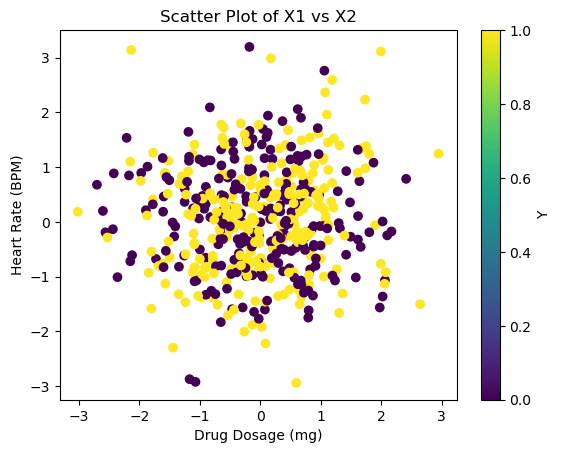

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c = Y, cmap = 'viridis')
plt.xlabel("Drug Dosage (mg)")
plt.ylabel("Heart Rate (BPM)")
plt.title("Scatter Plot of X1 vs X2")
plt.colorbar(label="Y") # Show colorbar to represent values in Y
plt.show()

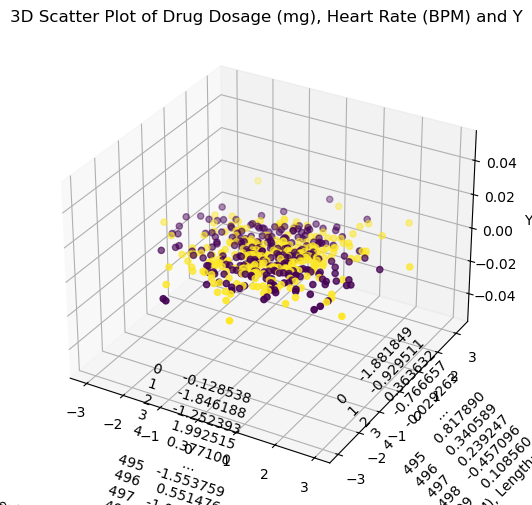

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))

axis = fig.add_subplot(111, projection = '3d')

axis.scatter(X.iloc[:, 0], X.iloc[:, 2], c= Y, cmap = 'viridis')

axis.set_xlabel(X.iloc[:, 0])
axis.set_ylabel(X.iloc[:, 2])
axis.set_zlabel('Y')
axis.set_title('3D Scatter Plot of Drug Dosage (mg), Heart Rate (BPM) and Y')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

X_vis = df[['Drug Dosage (mg)', 'Heart Rate (BPM)']] 
# Split correctly
X_train, X_test, Y_train, Y_test = train_test_split(X_vis, Y, test_size=0.3, random_state=42)

# Train model
model = SVC(kernel='linear')
model.fit(X_train, Y_train)

# Predictions
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Accuracy
score1 = accuracy_score(Y_train, Y_pred_train)
score2 = accuracy_score(Y_test, Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


Training score: 0.55
Test score: 0.59


In [18]:
# shufflesplit cross validation
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=500, test_size=0.3)
model = SVC(kernel='linear')

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(model, X_vis, Y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

print("CV-Training Accuracy",np.round(np.mean(train_scores),2))
print("CV-Test Accuracy",np.round(np.mean(test_scores),2))

CV-Training Accuracy 0.53
CV-Test Accuracy 0.5


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


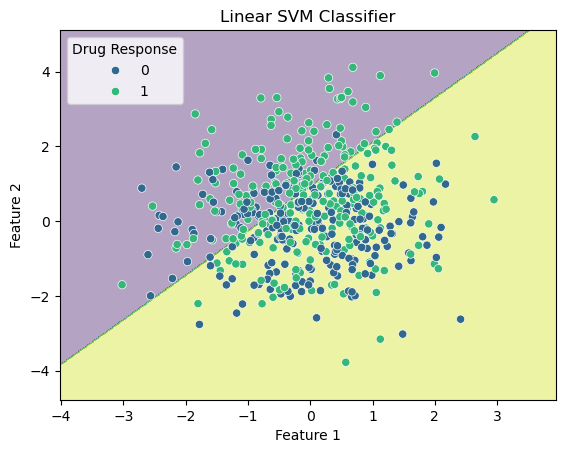

In [19]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
model = SVC(kernel='linear')
model.fit(X_train,Y_train)

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


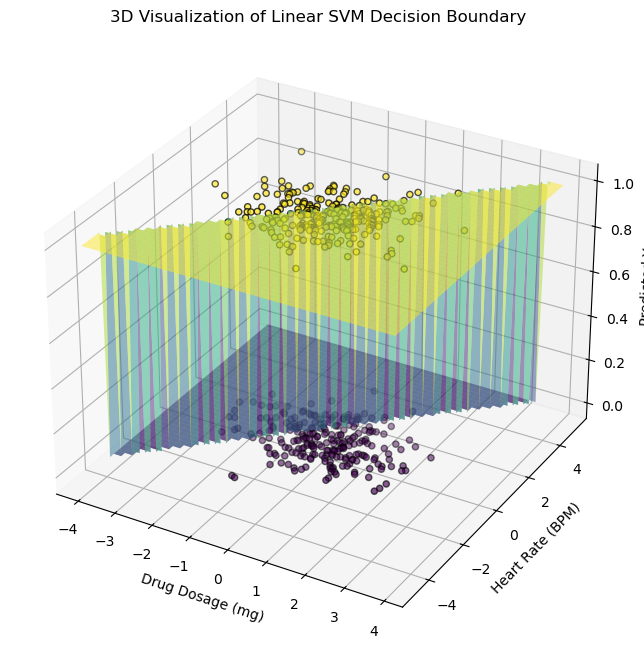

In [20]:
# prompt: show me the same graph in 3D by plotting linear model

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X, Y, and model are defined as in your previous code.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step for smoother plot
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.5)


# Plot the data points
ax.scatter(X['Drug Dosage (mg)'], X['Heart Rate (BPM)'], Y, c=Y, cmap='viridis', edgecolor='k') # Added edgecolor for better visibility


ax.set_xlabel('Drug Dosage (mg)')
ax.set_ylabel('Heart Rate (BPM)')
ax.set_zlabel('Predicted Y')
ax.set_title('3D Visualization of Linear SVM Decision Boundary')

plt.show()


In [11]:
df.columns

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


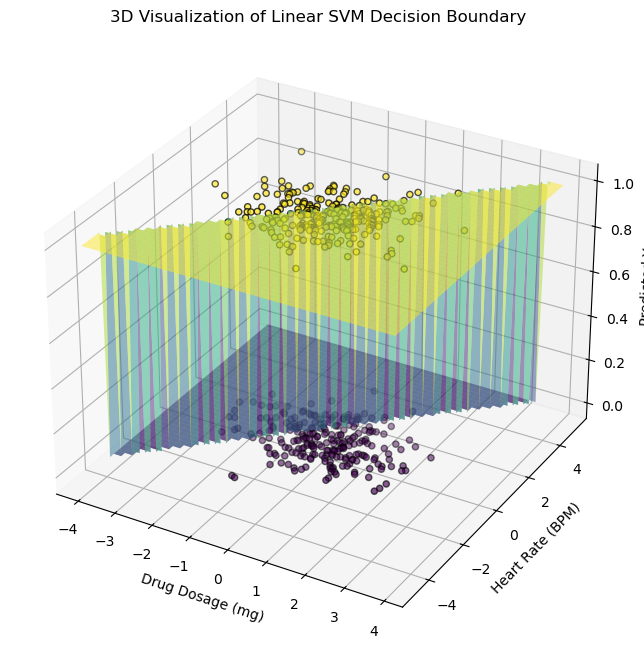

In [22]:
# prompt: show me the same graph in 3D by plotting linear model

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X, Y, and model are defined as in your previous code.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step for smoother plot
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.5)


# Plot the data points
ax.scatter(X['Drug Dosage (mg)'], X['Heart Rate (BPM)'], Y, c=Y, cmap='viridis', edgecolor='k') # Added edgecolor for better visibility


ax.set_xlabel('Drug Dosage (mg)')
ax.set_ylabel('Heart Rate (BPM)')
ax.set_zlabel('Predicted Y')
ax.set_title('3D Visualization of Linear SVM Decision Boundary')

plt.show()


In [30]:
from sklearn.svm import SVC

model = SVC(kernel= 'poly', degree = 20)

model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

train_score_poly = accuracy_score(Y_train, Y_pred_train)
test_score_poly = accuracy_score(Y_test, Y_pred_test)

print(np.round(train_score_poly,2))
print(np.round(test_score_poly,2))

0.52
0.49


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


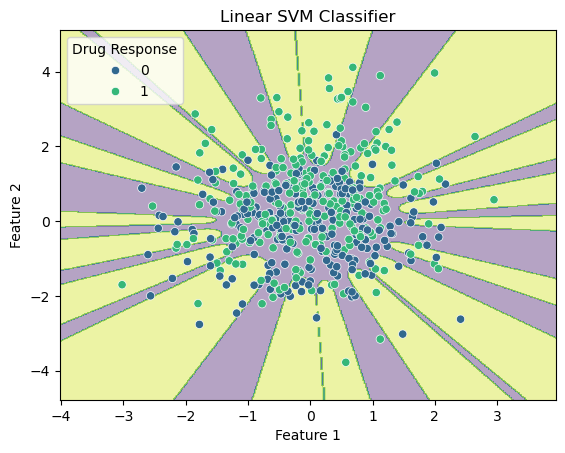

In [31]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


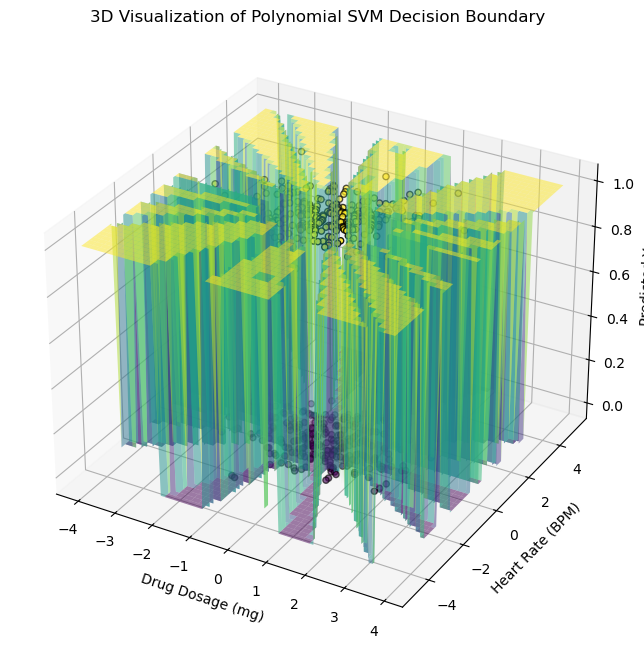

In [33]:
# prompt: show me the ploynomial model by 3D graph

# Assuming X, Y, and model are defined as in your previous code.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step for smoother plot
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.5)


# Plot the data points

ax.scatter(X['Drug Dosage (mg)'], X['Heart Rate (BPM)'], Y, c=Y, cmap='viridis', edgecolor='k') # Added edgecolor for better visibility


ax.set_xlabel('Drug Dosage (mg)')
ax.set_ylabel('Heart Rate (BPM)')
ax.set_zlabel('Predicted Y')
ax.set_title('3D Visualization of Polynomial SVM Decision Boundary')

plt.show()


In [34]:
# Radial basis classifier
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


Training score: 0.57
Test score: 0.61


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


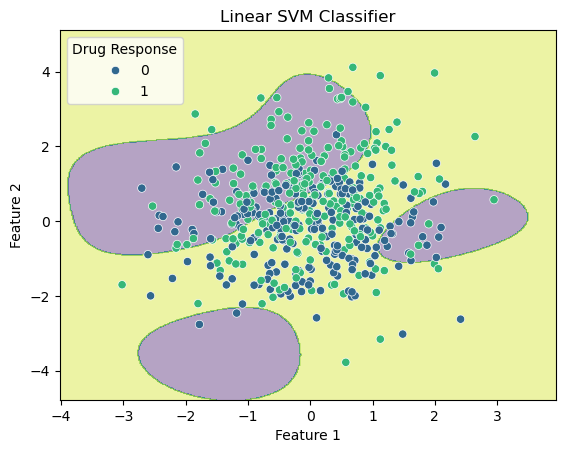

In [35]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


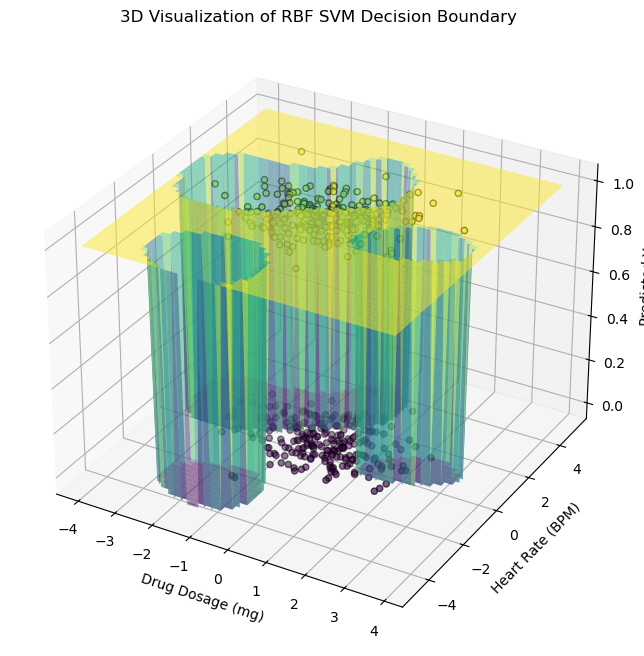

In [37]:
# prompt: show me the rbf graph in 3D

# Assuming X, Y, and model are defined as in your previous code.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step for smoother plot
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.5)


# Plot the data points
ax.scatter(X['Drug Dosage (mg)'], X['Heart Rate (BPM)'], Y, c=Y, cmap='viridis', edgecolor='k') # Added edgecolor for better visibility


ax.set_xlabel('Drug Dosage (mg)')
ax.set_ylabel('Heart Rate (BPM)')
ax.set_zlabel('Predicted Y')
ax.set_title('3D Visualization of RBF SVM Decision Boundary')

plt.show()


### Compare SVM Performance with Various Kernels
### Linear Kernel

Best when data is linearly separable.

Fast, interpretable, but struggles with curved boundaries.

### Polynomial Kernel

Adds flexibility by fitting polynomial decision boundaries.

Degree controls complexity (e.g., quadratic vs cubic).

Risk of overfitting if degree is too high.

### RBF Kernel (Radial Basis Function)

Captures complex non-linear boundaries smoothly.

Requires tuning of C and gamma.
RBF often performs best on biomedical/text datasets, polynomial is situational, and linear is good for simple separations.

### Strengths and Weaknesses for the Dataset (EDA + Visualization)
Based on biomedical-style dataset (Drug Dosage, Blood Pressure, Heart Rate, Liver Toxicity, Glucose):

### Strengths of SVM

Handles high-dimensional features well (5 variables).

Robust to overlapping classes if margins exist.

Kernel trick allows capturing non-linear relationships (e.g., dosage vs glucose response).

### Weaknesses of SVM

Visualization is limited: decision boundaries are clear in 2D, but harder in 5D.

Sensitive to scaling — all features must be standardized.

Large datasets (thousands of samples) can make training slow.

 ### Practical Implications in Real-World Classification
SVMs are widely applied in domains where accuracy and robustness matter more than interpretability:

Healthcare/Bioinformatics → disease classification, drug response prediction.

Image Recognition → face detection, handwriting recognition.

Text/NLP → spam detection, sentiment classification.

Finance → fraud detection, risk modeling.

### Implications:

SVMs are strong when datasets are small-to-medium and features are high-dimensional.

They require careful preprocessing (scaling, kernel choice).

For real-world deployment, interpretability and scalability are trade-offs: SVMs may be less transparent than Logistic Regression, and slower than tree-based models on very large datasets

## Linear kernel → use if data is clearly separable.

## Polynomial kernel → use for moderate non-linear boundaries.

## RBF kernel → default choice for complex, non-linear datasets like Current Data.